<a href="https://colab.research.google.com/github/madp3e/5ChClone/blob/master/Titanic_Kaggle_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import  random as rnd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [2]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
combine = [train_df, test_df]

In [3]:
#look at the available features
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
#take a look at how the dataframe looks like 
#check each feature, either alphanumeric, numeric or stringstype

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#check features that are alphanumeric or strings, inlude=["O"]
train_df.describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [6]:
#check survival rate base on Pclass
train_df[["Pclass","Survived"]].groupby("Pclass").mean().sort_values(ascending=True, by="Pclass")

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [7]:
#check survival rate base on sex
train_df[["Sex","Survived"]].groupby("Sex").mean().sort_values(ascending=True, by="Sex")

,Survived
Sex,
female,0.742038
male,0.188908


In [8]:
#check survival rate base on SibSp
train_df[["SibSp","Survived"]].groupby("SibSp").mean().sort_values(ascending=True, by="SibSp")

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [9]:
#check survival rate base on Parch
train_df[["Parch","Survived"]].groupby("Parch").mean().sort_values(ascending=True, by="Parch")

,Survived
Parch,
0,0.343658
1,0.550847
2,0.500000
3,0.600000
4,0.000000
5,0.200000
6,0.000000


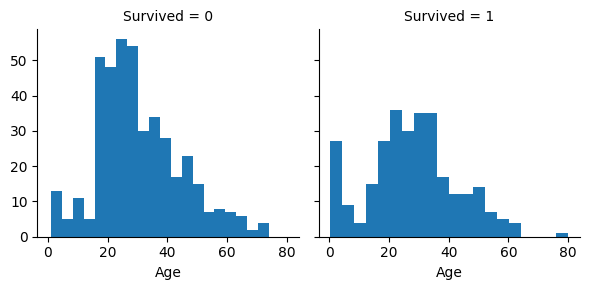

In [10]:
#visualizing the correlation between age and survival rate
sns.FacetGrid(train_df, col="Survived").map(plt.hist, "Age", bins=20)


In [11]:
#learnt
#By visualizing correlation between features and goal, we can decide either to keep the features or expunge them 
#Age and survival rate seems to have correlation, therefore it is worth keeping to be used with our model later

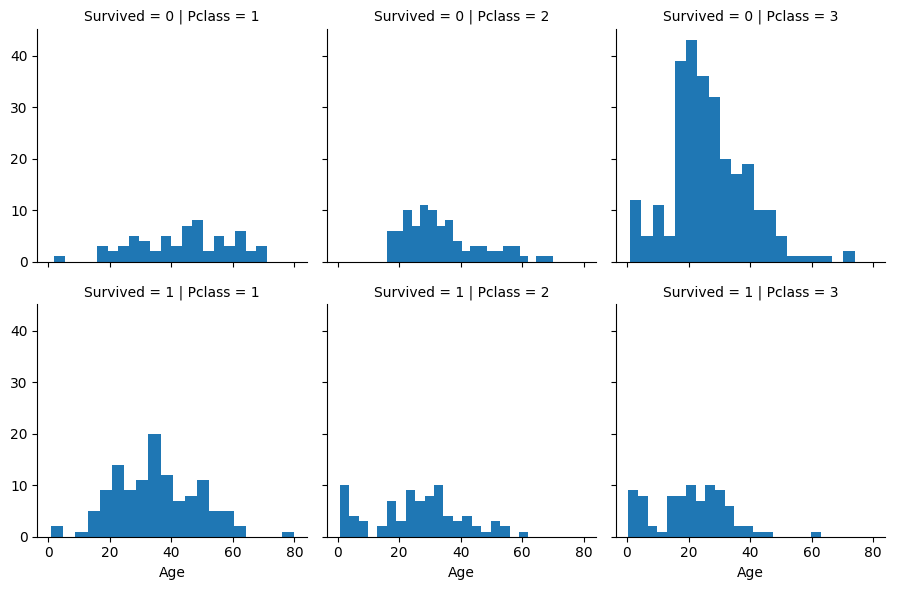

In [12]:
sns.FacetGrid(train_df, col="Pclass", row="Survived").map(plt.hist, "Age", bins=20).add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


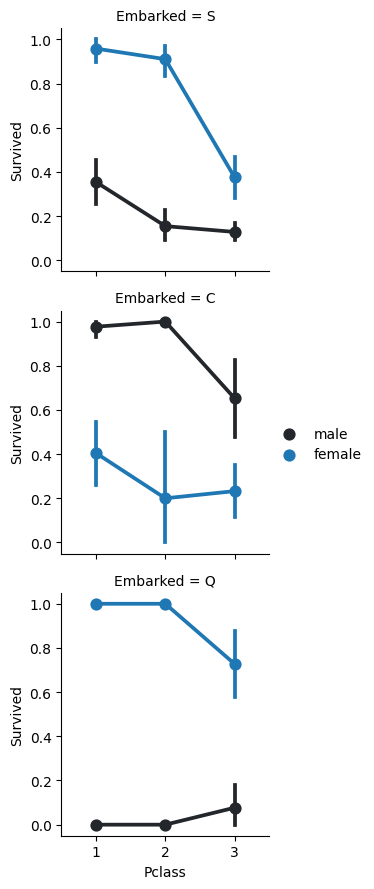

In [13]:
#visualizing the survival rate of sex, based on point of embarktion, and pclass

sns.FacetGrid(train_df, row="Embarked").map(sns.pointplot,"Pclass", "Survived", "Sex").add_legend()

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


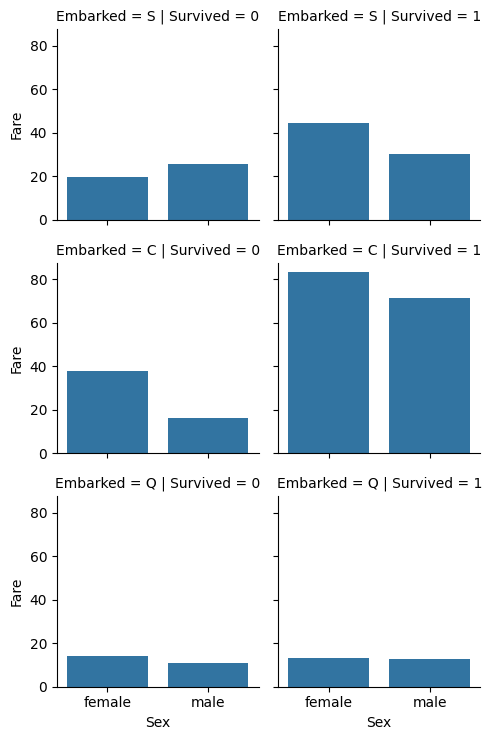

In [14]:
sns.FacetGrid(train_df, col="Survived", row="Embarked", height=2.5).map(sns.barplot, "Sex", "Fare", errorbar=None)

In [15]:
#drop "Ticket" and "Cabin" from the dataset
train_df = train_df.drop(["Ticket", "Cabin"], axis=1)
test_df = test_df.drop(["Ticket", "Cabin"], axis=1)
combine = [train_df, test_df]

In [16]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [17]:
#write a function that extract title from Name 
import re
def extract_title(name):
  title = re.search(' ([A-Za-z]+)\.', name).group().strip(".").strip()
  return title

train_df["Title"] = train_df["Name"].apply(extract_title)
test_df["Title"] = train_df["Name"].apply(extract_title)


In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr


In [19]:
train_df.groupby("Title")["Sex"].value_counts().unstack().fillna(0).astype(int)

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [20]:
def change_title(dataframe):
    dataframe["Title"] = dataframe["Title"].replace(["Lady", "Countess", "Capt","Col","Don","Dr","Major","Rev","Sir","Jonkheer","Dona"],"Rare")
    dataframe["Title"] = dataframe["Title"].replace({"Mlle" :"Miss","Ms":"Miss","Mme":"Mrs"})
  
    return dataframe

train_df = change_title(train_df)
test_df = change_title(test_df)


In [21]:
train_df[["Title", "Survived"]].groupby("Title").mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


In [22]:
#Title mappng function 
#we will change Mr=1, Miss=2, Mrs=3, Master=4, Rare=5

def title_mapping(df):
  df["Title"] = df["Title"].replace({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5})
  return df

for df in combine:
  df = title_mapping(df)



In [23]:
train_df = train_df.drop(["PassengerId", "Name"], axis=1)
test_df = test_df.drop(["PassengerId", "Name"], axis=1)



In [24]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3
2,1,3,female,26.0,0,0,7.9250,S,2
3,1,1,female,35.0,1,0,53.1000,S,3
4,0,3,male,35.0,0,0,8.0500,S,1


In [25]:
train_df["Sex"].replace({"female":1, "male":0}, inplace=True)
test_df["Sex"].replace({"female":1, "male":0}, inplace=True)


In [26]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,5
887,1,1,1,19.0,0,0,30.0000,S,2
888,0,3,1,NaN,1,2,23.4500,S,2
889,1,1,0,26.0,0,0,30.0000,C,1


In [27]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [28]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
 8   Title     891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [29]:
median_age_base_on_pclass_sex = train_df.groupby(["Pclass","Sex"])["Age"].median()
train_df["Age"].fillna(1, inplace=True)

In [30]:
median_age_base_on_pclass_sex

Pclass  Sex
1       0      40.0
        1      35.0
2       0      30.0
        1      28.0
3       0      25.0
        1      21.5
Name: Age, dtype: float64

In [31]:
train_df["Age"]=train_df["Age"].astype(int)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [32]:
combine = [train_df, test_df]

In [33]:
combine[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [35]:
for df in combine:
  for idx, row in df.iterrows():
    if row["Age"] == 1:
      df.loc[idx, "Age"] = median_age_base_on_pclass_sex[row["Pclass"], row["Sex"]]
      


In [36]:
#create an age band to determine corelation with survived

train_df["AgeBand"] = pd.cut(train_df["Age"], bins=5)
train_df[["AgeBand", "Survived"]].groupby("AgeBand", as_index=False).mean().sort_values(by="AgeBand",ascending=True)

In [80]:
def change_age(df):
  for idx, row in df.iterrows():
    if row["Age"] <= 16:
      df.loc[idx, "Age"] = 0
    if (row["Age"] > 16) & (row["Age"] <= 32):
      df.loc[idx, "Age"] = 1
    if (row["Age"] > 32) & (row["Age"] <= 48):
      df.loc[idx, "Age"] = 2
    if (row["Age"] > 48) & (row["Age"] <= 64):
      df.loc[idx, "Age"] = 3
  return df

for df in combine:
  df = change_age(df)


In [38]:
train_df["Age"] = train_df["Age"].astype(int)

In [81]:
test_df.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2.0,0.0,2,1,1,103.5
1,3,1,2.0,0.0,0,3,0,141.0
2,2,0,3.0,1.0,2,2,1,124.0
3,3,0,1.0,1.0,0,3,1,81.0
4,3,1,1.0,1.0,0,1,0,66.0


In [40]:
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,13.0000,S,5
887,1,1,1,1,0,0,30.0000,S,2
888,0,3,1,1,1,2,23.4500,S,2
889,1,1,0,1,0,0,30.0000,C,1


In [41]:
# we will remove AgeBand column


In [42]:
#new feature family size from SibSp Parch
# + 1 is to include the passenger 
for df in combine:
  df["FamilySize"] = df["SibSp"] + df["Parch"] + 1

train_df[["FamilySize", "Survived"]].groupby(["FamilySize"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [43]:
#create another feature called isAlone, travelling alone =1 , with family = 0
for df in combine:
  df["IsAlone"] = 0
  df.loc[df["FamilySize"] == 1, "IsAlone"] = 1

In [44]:
train_df[["IsAlone", "Survived"]].groupby(["IsAlone"], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [45]:
test_df = test_df.drop(["Parch","SibSp","FamilySize"], axis=1)

In [46]:
print(train_df.shape, test_df.shape)

(891, 11) (418, 7)


In [47]:
print(train_df.shape, test_df.shape)

(891, 11) (418, 7)


In [50]:
#change age to categorical
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')

In [49]:
test_df.columns

Index(['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title', 'IsAlone'], dtype='object')

In [52]:
test_df["Age"] = read_age_only_test

In [53]:
combine = [train_df, test_df]
for df in combine:
  print(df.head())

   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked  Title  \
0         0       3    0    1      1      0   7.2500        S      1   
1         1       1    1    2      1      0  71.2833        C      3   
2         1       3    1    1      0      0   7.9250        S      2   
3         1       1    1    2      1      0  53.1000        S      3   
4         0       3    0    2      0      0   8.0500        S      1   

   FamilySize  IsAlone  
0           2        0  
1           2        0  
2           1        1  
3           2        0  
4           1        1  
   Pclass  Sex   Age     Fare Embarked  Title  IsAlone
0       3    0  34.5   7.8292        Q      1        1
1       3    1  47.0   7.0000        S      3        0
2       2    0  62.0   9.6875        Q      2        1
3       3    0  27.0   8.6625        S      3        1
4       3    1  22.0  12.2875        S      1        0


In [54]:
median_age_by_class_and_sex = [df.groupby(["Sex","Pclass"])["Age"].median() for df in combine]


In [55]:
median_age_by_class_and_sex

[Sex  Pclass
 0    1         2.0
      2         1.0
      3         1.0
 1    1         2.0
      2         1.0
      3         1.0
 Name: Age, dtype: float64,
 Sex  Pclass
 0    1         42.0
      2         28.0
      3         24.0
 1    1         41.0
      2         24.0
      3         22.0
 Name: Age, dtype: float64]

In [56]:
median_age_by_class_and_sex[0].loc[0, 3]

1.0

In [57]:
median_age_by_class_and_sex

counter = 0
for df in combine :
  for idx, row in df.iterrows():
    if pd.isnull(row["Age"]):
      df.loc[idx, "Age"] = median_age_by_class_and_sex[counter].loc[row["Sex"], row["Pclass"]]
  counter += 1
      

In [83]:
for df in combine:
  df["Age*Class"] = df["Age"] * df["Pclass"]

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)


,Age*Class,Age,Pclass
0,0,0,3
1,0,0,1
2,0,0,3
3,0,0,1
4,0,0,3
5,0,0,3
6,0,0,1
7,0,0,3
8,0,0,3
9,0,0,2


In [60]:
#Embarked feature also has missing value, fill them with most freq value of embarked point

freq_port = train_df["Embarked"].dropna().mode()[0]
freq_port

'S'

In [61]:
for df in combine :
  df["Embarked"] = df["Embarked"].fillna(freq_port)

train_df[["Embarked","Survived"]].groupby("Embarked", as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [62]:
for df in combine:
  df["Embarked"] = df["Embarked"].replace({"S":0, "C":1, "Q":2}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone,Age*Class
0,0,3,0,1,1,0,7.2500,0,1,2,0,3
1,1,1,1,2,1,0,71.2833,1,3,2,0,2
2,1,3,1,1,0,0,7.9250,0,2,1,1,3
3,1,1,1,2,1,0,53.1000,0,3,2,0,2
4,0,3,0,2,0,0,8.0500,0,1,1,1,6


In [63]:
#Fill missing fare value with the median fare

test_df["Fare"].fillna(test_df["Fare"].dropna().median(), inplace=True)

In [64]:
for df in combine:
  df["FareBand"] = pd.qcut(df["Fare"], q=4)

In [65]:
train_df[["FareBand", "Survived"]].groupby("FareBand", as_index=False).mean().sort_values(by="FareBand", ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [66]:
for df in combine:
  for idx, row in df.iterrows():
    if row["Fare"] <= 7.91:
      df.loc[idx, "Fare"] = 0
    if (row["Fare"] > 7.91) & (row["Fare"] <= 14.454):
      df.loc[idx, "Fare"] = 1
    if (row["Fare"] > 14.454) & (row["Fare"] <= 31):
      df.loc[idx, "Fare"] = 2
    if row["Fare"] > 48:
      df.loc[idx, "Fare"] = 3


#Cleaner Code from chatGPT
for df in combine:
    df['FareBand'] = pd.cut(df['Fare'], bins=[0, 7.91, 14.454, 31, 1000], labels=[0, 1, 2, 3])
    df['FareBand'] = df['FareBand'].astype(int)

In [67]:
for df in combine:
  df.drop("FareBand", inplace=True, axis=1)

In [84]:
for df in combine:
  print(df)

     Survived  Pclass  Sex  Age  SibSp  Parch  Fare  Embarked  Title  \
0           0       3    0    0      1      0   0.0         0      1   
1           1       1    1    0      1      0   3.0         1      3   
2           1       3    1    0      0      0   1.0         0      2   
3           1       1    1    0      1      0   3.0         0      3   
4           0       3    0    0      0      0   1.0         0      1   
..        ...     ...  ...  ...    ...    ...   ...       ...    ...   
886         0       2    0    0      0      0   1.0         0      5   
887         1       1    1    0      0      0   2.0         0      2   
888         0       3    1    0      1      2   2.0         0      2   
889         1       1    0    0      0      0   2.0         1      1   
890         0       3    0    0      0      0   0.0         2      1   

     FamilySize  IsAlone  Age*Class  
0             2        0          0  
1             2        0          0  
2             1      

In [87]:
list(set(train_df.columns)-set(test_df.columns))

['SibSp', 'Parch', 'FamilySize', 'Survived']

In [98]:
combine = [train_df, test_df]

In [101]:
test_df["FamiliSize"] = pd.read_csv("test.csv")["SibSp"] + pd.read_csv("test.csv")["Parch"] + 1

In [108]:
test_df.rename(columns={"FamiliSize" : "FamilySize"}, inplace=True)

In [110]:
combine

[     Survived  Pclass  Sex  Age  Fare  Embarked  Title  FamilySize  IsAlone  \
 0           0       3    0    0   0.0         0      1           2        0   
 1           1       1    1    0   3.0         1      3           2        0   
 2           1       3    1    0   1.0         0      2           1        1   
 3           1       1    1    0   3.0         0      3           2        0   
 4           0       3    0    0   1.0         0      1           1        1   
 ..        ...     ...  ...  ...   ...       ...    ...         ...      ...   
 886         0       2    0    0   1.0         0      5           1        1   
 887         1       1    1    0   2.0         0      2           1        1   
 888         0       3    1    0   2.0         0      2           4        0   
 889         1       1    0    0   2.0         1      1           1        1   
 890         0       3    0    0   0.0         2      1           1        1   
 
      Age*Class  
 0            0  
 1

In [115]:
train_df[["FamilySize", "Survived"]].groupby("FamilySize", as_index=False).mean()

,FamilySize,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [117]:
train_df[["IsAlone", "Survived"]].groupby("IsAlone", as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [119]:
for df in combine:
  try:
    df.drop("FamilySize", inplace=True, axis=1)
  except:
    print("column dropped")

## Now is time to train our data with machine learning algos

In [121]:
# Split the data , train set and test set
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test = test_df.copy()

for df in [X_train, Y_train, X_test]:
  print(df.shape)

(891, 8)
(891,)
(418, 8)


##### LOGISTIC REGRESSION = 79.12

In [132]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
Y_pred = log_reg.predict(X_test)
accuracy_log = log_reg.score(X_train, Y_train) * 100
accuracy_log = round(accuracy_log, 2)
accuracy_log

79.12

In [137]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ["Feature"]
coeff_df

,Feature
0,Pclass
1,Sex
2,Age
3,Fare
4,Embarked
5,Title
6,IsAlone
7,Age*Class


In [142]:
coeff_df["Corelation"] = pd.Series(log_reg.coef_[0])
coeff_df.sort_values(by="Corelation", ascending=False)

,Feature,Corelation
1,Sex,2.131724
5,Title,0.436924
4,Embarked,0.286915
2,Age,0.043722
6,IsAlone,0.011258
3,Fare,-0.023215
7,Age*Class,-0.063529
0,Pclass,-0.970356


##### SUPPORT VECTOR MACHINE (SVM) = 78.90





In [146]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
accuracy_svc = svc.score(X_train, Y_train)
accuracy_svc = round(accuracy_svc * 100, 2)
accuracy_svc

78.9

##### KNN  = 83.16

In [147]:

knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
accuracy_knn = knn.score(X_train, Y_train) * 100
accuracy_knn = round(accuracy_knn, 2)
accuracy_knn

83.16

#### GAUSSIAN NAIVE BAYES = 73.96

In [148]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
accuracy_gaussian = gaussian.score(X_train, Y_train) * 100
accuracy_gaussian = round(accuracy_gaussian, 2)
accuracy_gaussian

73.96

#### PERCEPTRON = 76.68

In [149]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
accuracy_preceptron = perceptron.score(X_train,Y_train) * 100
accuracy_preceptron = round(accuracy_preceptron, 2)
accuracy_preceptron

78.68

#### LINEAR SVC = 79.12

In [166]:
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
accuracy_Lsvc = linear_svc.score(X_train, Y_train) * 100
accuracy_Lsvc = round(accuracy_Lsvc, 2)
accuracy_Lsvc

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


79.12

#### SGDClassifier = 70.26

In [179]:
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, Y_train)
y_pred = sgd.predict(X_test)
accuracy_sgd = sgd.score(X_train, Y_train) * 100
accuracy_sgd = round(accuracy_sgd, 2)
accuracy_sgd

70.26

#### DECISION TREE = 84.96

In [184]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
accuracy_d_t = decision_tree.score(X_train, Y_train) * 100
accuracy_d_t = round(accuracy_d_t, 2)
accuracy_d_t

84.96

#### RANDOM FOREST = 84.96

In [190]:
random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(X_train, Y_train)
Y_test = random_forest.predict(X_test)
accuracy_rf = random_forest.score(X_train, Y_train) * 100
accuracy_rf = round(accuracy_rf, 2)
accuracy_rf

84.96

 ## MODEL EVALUATION

In [194]:
models = ["Logistic regressin","SVM","KNN","NAIVE BAYES", "PERCEPTRON", "LINEAR SVC", "SGDCLASSIFIER", "DECISION TREE", "Random Forest"  ]
accuracies = [accuracy_log, accuracy_svc, accuracy_knn, accuracy_gaussian, accuracy_preceptron, accuracy_svc,accuracy_sgd,accuracy_d_t, accuracy_rf] 

Models_Score = pd.DataFrame({
    "model" : [model.capitalize() for model in models],
    "score" : accuracies
})

In [198]:
Models_Score.sort_values(by="score", ascending=False)

,model,score
7,Decision tree,84.96
8,Random forest,84.96
2,Knn,83.16
0,Logistic regressin,79.12
1,Svm,78.90
5,Linear svc,78.90
4,Perceptron,78.68
3,Naive bayes,73.96
6,Sgdclassifier,70.26
